### Import Libraries:

Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\mythi\\Downloads\\FEATURE ENGINEERING\\Titanic dataset\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

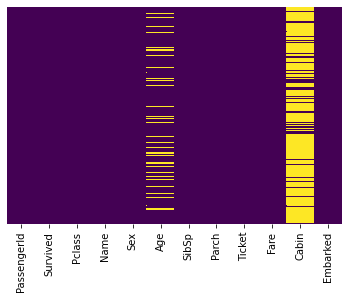

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

This seaborn heatmap clearly shows Age and Cabin has more no.of NaN values.

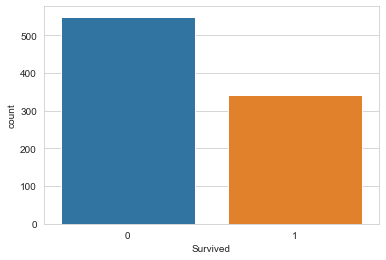

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df)

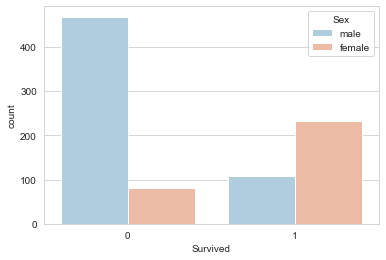

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=df, palette="RdBu_r")

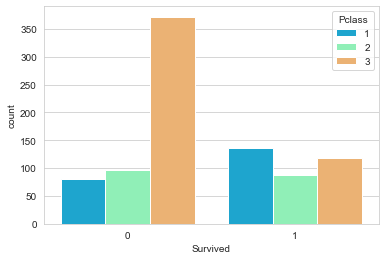

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=df, palette="rainbow")

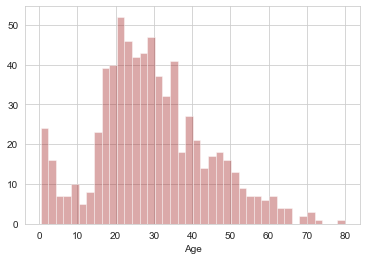

In [10]:
sns.distplot(df["Age"].dropna(),kde=False,color="brown", bins=40)

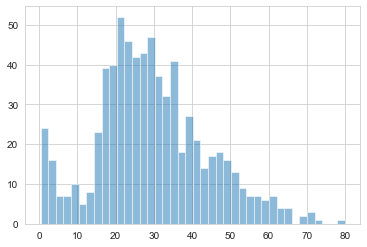

In [11]:
#Through matplotlib

df["Age"].hist(bins=40, alpha=0.5)  #alpha= contrast

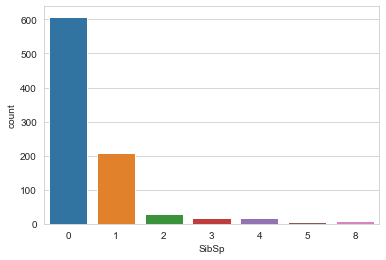

In [12]:
sns.countplot(x="SibSp", data=df)

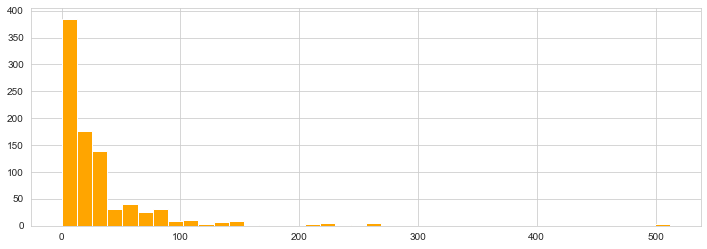

In [13]:
#Ticket Fare:

df["Fare"].hist(color="orange",bins=40, figsize=(12,4))

### DATA CLEANING:

    Replace the Null values

In [14]:
print(df.isnull().sum())

print(df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


In [15]:
Age_Null_Pct = round((177/891)*100, 2)
Age_Null_Pct

19.87

### Let's focus on replacing Age Null Values:

In [16]:
round(df["Age"].mean(),2)

29.7

In [17]:
#Let's see whether is there relationship betwwen our age column and other feature:

df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


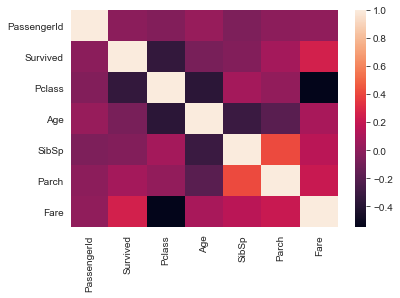

In [18]:
sns.heatmap(df.corr())

### Instead of filling Age NaN values with mean(), maybe we can find Age Average based on Sex or Pclass

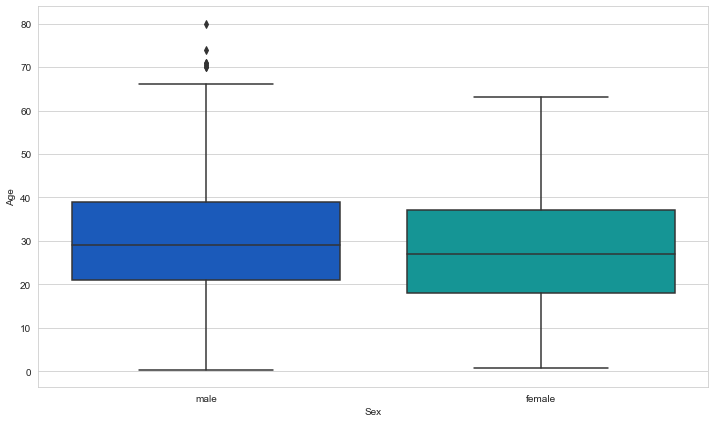

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,7))

sns.boxplot(x="Sex", y="Age",data=df, palette="winter")

In [20]:
df.groupby("Sex")["Age"].mean().round(decimals=2)

Sex
female    27.92
male      30.73
Name: Age, dtype: float64

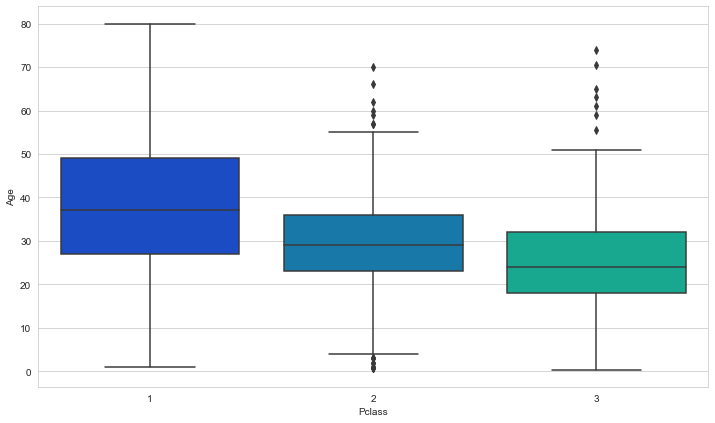

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,7))

sns.boxplot(x="Pclass", y="Age",data=df, palette="winter")

In [22]:
df.groupby("Pclass")["Age"].mean().round(decimals=2)

Pclass
1    38.23
2    29.88
3    25.14
Name: Age, dtype: float64

This shows higher class people (more wealthier) tend to be older than other two classes. So "Pclass" gives the better reason than "Sex" to impute Age NaN Values..

In [23]:
def impute_Age_NaN(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38.23
        if Pclass==2:
            return 29.88
        if Pclass==3:
            return 25.14
        
    else:
        return Age

In [24]:
df["Age"] = df[["Age","Pclass"]].apply(impute_Age_NaN, axis=1)

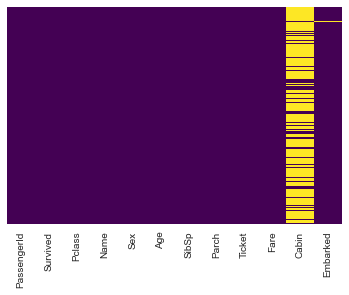

In [25]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin Column Null Values:

In [27]:
Cabin_NaN_Pct = round((687/891)*100)
Cabin_NaN_Pct

77

There's lot of Null Values, So let's drop this column

In [28]:
df.drop("Cabin", axis=1, inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
df.dropna(inplace=True)

# CONVERTING CATEGORICAL FEATURES


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Features like ["Sex","Embarked"] both categorical features need to be replaced to numerical values(in order to apply machine learning techniques)
Also here some features will not be required for our analysis like ["Name","Ticket"]

In [32]:
print(df["Embarked"].value_counts())
print()
print(df["Sex"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

male      577
female    312
Name: Sex, dtype: int64


In [33]:
Embarked = pd.get_dummies(df["Embarked"], drop_first=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [34]:
Sex = pd.get_dummies(df["Sex"], drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [35]:
print(df.shape)
print(Sex.shape)
print(Embarked.shape)

(889, 11)
(889, 1)
(889, 2)


In [36]:
df.drop(["PassengerId","Name","Ticket", "Sex", "Embarked"], axis=1, inplace=True)

In [37]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.00,1,0,7.2500
1,1,1,38.00,1,0,71.2833
2,1,3,26.00,0,0,7.9250
3,1,1,35.00,1,0,53.1000
4,0,3,35.00,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.00,0,0,13.0000
887,1,1,19.00,0,0,30.0000
888,0,3,25.14,1,2,23.4500
889,1,1,26.00,0,0,30.0000


In [38]:
df = pd.concat([df, Sex, Embarked], axis=1)
df.head(100)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
96,0,1,71.0,0,0,34.6542,1,0,0
97,1,1,23.0,0,1,63.3583,1,0,0
98,1,2,34.0,0,1,23.0000,0,0,1
99,0,2,34.0,1,0,26.0000,1,0,1


In [39]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

 Now the data is ready for Model.

# Building Logistic Regression Model:

        This dataset is considered as a training dataset and there is another file which we can use as a test dataset

### Train Test Split

In [40]:
df.drop("Survived", axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00,1,0,7.2500,1,0,1
1,1,38.00,1,0,71.2833,0,0,0
2,3,26.00,0,0,7.9250,0,0,1
3,1,35.00,1,0,53.1000,0,0,1
4,3,35.00,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00,0,0,13.0000,1,0,1
887,1,19.00,0,0,30.0000,0,0,1
888,3,25.14,1,2,23.4500,0,0,1
889,1,26.00,0,0,30.0000,1,0,0


In [41]:
df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [42]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]

In [43]:
from sklearn.model_selection import train_test_split

# Training and Predicting:

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.30, random_state=101)

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
accuracy = confusion_matrix(Y_test, predictions)
accuracy

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.8314606741573034

In [52]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)